In [1]:
# in this notebook I will clean data from apple maps:
# https://covid19-static.cdn-apple.com/mobility

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf

In [88]:
raw_data = pd.read_csv("../data/original_applemobilitytrends-2020-10-11.csv")#,parse_dates = ['encounter_timestamp'])

C:\Users\Yotam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [157]:
data_nyc_walking = raw_data[(raw_data['region'] == 'New York City') &
                   (raw_data['transportation_type'] == 'walking')]
data_nyc_driving = raw_data[(raw_data['region'] == 'New York City') &
                   (raw_data['transportation_type'] == 'driving')]
data_nyc_transit = raw_data[(raw_data['region'] == 'New York City') &
                   (raw_data['transportation_type'] == 'transit')]

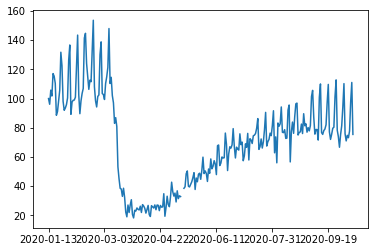

In [158]:
data_nyc[data_nyc['transportation_type'] == 'walking'].iloc[0,6:].plot()

In [159]:
data_nyc_walking

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11
646,city,New York City,walking,NYC,New York,United States,100.0,96.09,105.77,101.73,...,94.32,110.23,75.86,70.99,74.81,73.17,77.76,97.63,111.03,75.44


In [217]:
nyc_walking = pd.DataFrame(data_nyc_walking.iloc[0]['2020-03-31':].rename('original'))

In [218]:
nyc_walking

,original
2020-03-31,22.96
2020-04-01,25.07
2020-04-02,24.07
2020-04-03,23.7
2020-04-04,26.26
...,...
2020-10-07,73.17
2020-10-08,77.76
2020-10-09,97.63
2020-10-10,111.03


In [219]:
nyc_walking['original'].pct_change()

2020-03-31         NaN
2020-04-01    0.091899
2020-04-02   -0.039888
2020-04-03   -0.015372
2020-04-04    0.108017
                ...   
2020-10-07   -0.021922
2020-10-08    0.062731
2020-10-09    0.255530
2020-10-10    0.137253
2020-10-11   -0.320544
Name: original, Length: 195, dtype: float64

In [220]:
nyc_walking['pct_change'] = nyc_walking['original'].pct_change() * 100

In [221]:
nyc_walking['renomalized'] = np.nan

In [222]:
nyc_walking['renomalized']['2020-03-31'] = 100 

In [223]:
nyc_walking

,original,pct_change,renomalized
2020-03-31,22.96,NaN,100.0
2020-04-01,25.07,9.189895,NaN
2020-04-02,24.07,-3.988831,NaN
2020-04-03,23.7,-1.537183,NaN
2020-04-04,26.26,10.801688,NaN
...,...,...,...
2020-10-07,73.17,-2.192220,NaN
2020-10-08,77.76,6.273063,NaN
2020-10-09,97.63,25.552984,NaN
2020-10-10,111.03,13.725289,NaN


In [224]:
nyc_walking['renomalized']['2020-04-01'] = nyc_walking['renomalized']['2020-03-31'] + nyc_walking['pct_change']['2020-04-01']

In [225]:
nyc_walking['renomalized']['2020-04-02'] = nyc_walking['renomalized']['2020-04-01'] + nyc_walking['pct_change']['2020-04-02']

In [227]:
nyc_walking.head(10)

,original,pct_change,renomalized
2020-03-31,22.96,NaN,100.000000
2020-04-01,25.07,9.189895,109.189895
2020-04-02,24.07,-3.988831,105.201064
2020-04-03,23.7,-1.537183,NaN
2020-04-04,26.26,10.801688,NaN
2020-04-05,21.96,-16.374714,NaN
2020-04-06,27.33,24.453552,NaN
2020-04-07,26.41,-3.366264,NaN
2020-04-08,24.83,-5.982582,NaN
2020-04-09,21.52,-13.330648,NaN


In [208]:
nyc_walking['renomalized'].shift()

2020-03-31           NaN
2020-04-01    100.000000
2020-04-02    109.189895
2020-04-03    105.201064
2020-04-04           NaN
                 ...    
2020-10-07           NaN
2020-10-08           NaN
2020-10-09           NaN
2020-10-10           NaN
2020-10-11           NaN
Name: renomalized, Length: 195, dtype: float64

In [209]:
nyc_walking

,original,pct_change,renomalized
2020-03-31,22.96,NaN,100.000000
2020-04-01,25.07,9.189895,109.189895
2020-04-02,24.07,-3.988831,105.201064
2020-04-03,23.7,-1.537183,NaN
2020-04-04,26.26,10.801688,NaN
...,...,...,...
2020-10-07,73.17,-2.192220,NaN
2020-10-08,77.76,6.273063,NaN
2020-10-09,97.63,25.552984,NaN
2020-10-10,111.03,13.725289,NaN


In [206]:
nyc_walking['renomalized'].interpolate()

2020-03-31    100.000000
2020-04-01    109.189895
2020-04-02    105.201064
2020-04-03    105.201064
2020-04-04    105.201064
                 ...    
2020-10-07    105.201064
2020-10-08    105.201064
2020-10-09    105.201064
2020-10-10    105.201064
2020-10-11    105.201064
Name: renomalized, Length: 195, dtype: float64

In [178]:
nyc_walking['renomalized'] = nyc_walking['renomalized'] + nyc_walking['pct_change'].shift(1)

In [99]:
pct_change_31_03_onwards = pd.DataFrame(data_nyc_walking.iloc[0]['2020-03-31':].pct_change()
                                        .rename('pct_change'))

In [101]:
pct_change_31_03_onwards['base'] = np.nan

In [105]:
pct_change_31_03_onwards['base']['2020-03-31'] = 100

In [112]:
pct_change_31_03_onwards['pct_change']['2020-03-31'] = 100

In [121]:
pct_change_31_03_onwards['pct_change'].shift(-1)

2020-03-31    0.091899
2020-04-01   -0.039888
2020-04-02   -0.015372
2020-04-03    0.108017
2020-04-04   -0.163747
                ...   
2020-10-07    0.062731
2020-10-08    0.255530
2020-10-09    0.137253
2020-10-10   -0.320544
2020-10-11         NaN
Name: pct_change, Length: 195, dtype: float64

In [122]:
pct_change_31_03_onwards['base'] = pct_change_31_03_onwards['pct_change'] + pct_change_31_03_onwards['pct_change'].shift(-1)

In [124]:
pct_change_31_03_onwards

,pct_change,base
2020-03-31,100.000000,100.091899
2020-04-01,0.091899,0.052011
2020-04-02,-0.039888,-0.055260
2020-04-03,-0.015372,0.092645
2020-04-04,0.108017,-0.055730
...,...,...
2020-10-07,-0.021922,0.040808
2020-10-08,0.062731,0.318260
2020-10-09,0.255530,0.392783
2020-10-10,0.137253,-0.183291


In [127]:
d = {'a':1,"b":2,"c":3,"d":0}

In [133]:
tmp = pd.DataFrame(pd.Series(index = range(0,10), data = range(100,110)))

In [136]:
tmp['base'] = np.nan

In [149]:
tmp['pct_change'] = tmp[0].pct_change()*100

In [155]:
tmp['base'] = tmp[0].shift(1) + tmp['pct_change']

In [156]:
tmp

,0,base,pct_change
0,100,NaN,NaN
1,101,101.000000,1.000000
2,102,101.990099,0.990099
3,103,102.980392,0.980392
4,104,103.970874,0.970874
5,105,104.961538,0.961538
6,106,105.952381,0.952381
7,107,106.943396,0.943396
8,108,107.934579,0.934579
9,109,108.925926,0.925926


In [125]:
pd.DataFrame({'a':1,"b":2,"c":3,"d":0})

ValueError: If using all scalar values, you must pass an index

In [69]:
((25.07 - 22.96)/22.96)*100

9.189895470383272

In [71]:
data_nyc_walking.loc[:,].pct_change()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [29]:
data_nyc_transit['2020-03-31']

645    14.55
Name: 2020-03-31, dtype: float64

In [30]:
data_nyc_driving['2020-03-31']

644    39.59
Name: 2020-03-31, dtype: float64

array([77.1])